# Введение

В начале мы познакомимся с форматом данных [FASTA](https://ru.wikipedia.org/wiki/FASTA), с которым мы будем работать в мастерской, научимся находить и скачивать биологические данные и вспомним Python. 

Мы будем работать с [.ipynb](https://ru.wikipedia.org/wiki/IPython) блокнотами, которые содержат код вместе с [Markdown текстом](https://ru.wikipedia.org/wiki/Markdown) и позволяют выполнять линуксовые команды. На синие ссылки можно кликать, там содержится дополнительная информация.

Подробнее про этот файл и Google Colab можно прочитать [здесь](https://colab.research.google.com/). Вы можете сохранить этот блокнот себе на гугл диск, чтобы сохранить изменения и писать код прямо тут. 

`Файл->Cохранить копию на Диске`

## Задача
В этом задании мы напишем несколько функций, чтобы найти [шпильки](https://ru.wikipedia.org/wiki/%D0%A8%D0%BF%D0%B8%D0%BB%D1%8C%D0%BA%D0%B0_(%D0%B1%D0%B8%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F)) в [транспортной РНК](https://ru.wikipedia.org/wiki/%D0%A2%D0%A0%D0%9D%D0%9A). Шпилька это структура, которая образуется когда две [комплементарные](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%BF%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C_(%D0%B1%D0%B8%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F)) части одной последовательности взаимодейстуют между собой. В [тРНК](https://ru.wikipedia.org/wiki/%D0%A2%D0%A0%D0%9D%D0%9A) их легко найти, так как они очень важны для её работы и образуют её пространственную структуру.

Вот так выглядит шпилька.

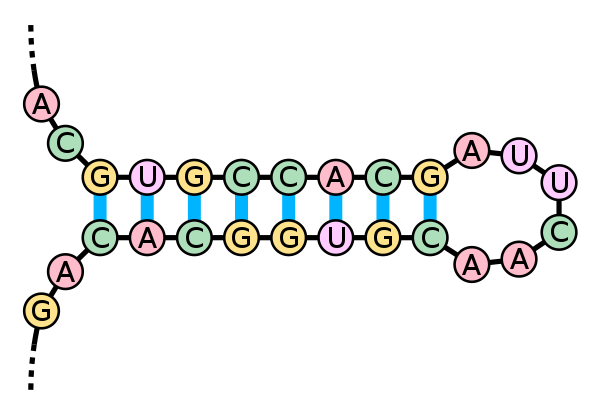




## Данные
В биоинформатике многие данные можно найти в открытом доступе, научные открытия можно совершать даже не находясь в лаборатории!

Я заранее нашёл тРНК растения [*Arabidopsis thaliana*](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B7%D1%83%D1%85%D0%BE%D0%B2%D0%B8%D0%B4%D0%BA%D0%B0_%D0%A2%D0%B0%D0%BB%D1%8F) которое является модельным объектом биологии - очень хорошо изученным организмом. Они, как и все биологические последовательности (РНК, ДНК,белки), записаны в [формате FASTA](https://ru.wikipedia.org/wiki/FASTA). Это очень простой формат текстовых файлов. Для каждой последовательности на первой строчке содержится описание, которое всегда начинается c `>`, на остальных строках содержится сама последовательность, которая __может быть разделена переносом строки `\n`__. Текст последовательности заканчивается на следующем описании `>` или с концом файла.

[NCBI](https://www.ncbi.nlm.nih.gov/) и [Uniprot](https://www.uniprot.org/) являются самыми крупными базами данных. На них можно найти разнообразную информацию о всех прочитанных геномах, а также обо всех известных генах и белках. Для проекта в мастерской мы будем скачивать информацию из них.

Вначале данные скачивают из базы данных. Для этого их фильтруют по организмам, методу исследования, по функции гена и т.д. В нашем случае [это можно посмотреть здесь](https://rnacentral.org/search?q=so_rna_type_name:%22tRNA%22%20AND%20length:%5B12%20TO%205962%5D%20AND%20has_secondary_structure:%22True%22%20AND%20rna_type:%22tRNA%22%20AND%20qc_warning_found:%22False%22%20AND%20TAXONOMY:%223702%22)


### Скачаем их
После того как мы нашли нужные данные, их необходимо скачать себе на комьютер или на сервер. Мы скачаем их на Google Colab, он позволяет интерактивно запускать .ipynb файлы и предоставляет довольно мощные видеокарты на которых мы будем обучать нейросети.

Код и текст находится в разных ячейках. Под ячейкой пишется её вывод в консоль, вы можете видеть результат выполнения ячеек, когда я запускал этот блокнот. Чтобы запустить ячейку с кодом кликните на неё и нажмите Ctrl+Enter или нажмите на значок слева от кода.

Скачаем и распакуем файл. Обычно код в ячейке выполняется на python, `!` перед строкой запускает её в консоли сервера на [bash](https://ru.wikipedia.org/wiki/Bash).

In [2]:
!curl https://rnacentral.org/export/download-result?job=24e03179-2489-40d6-baef-11eb40e62ecd -o rna.fasta.gz
!gunzip rna.fasta.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14927  100 14927    0     0   104k      0 --:--:-- --:--:-- --:--:--  104k


## Теперь вам предстоит закончить задание


Посмотрим на скачанные файлы. Нас интересует rna.fasta.

In [3]:
!ls

rna.fasta  sample_data


Посмотрим на первые несколько строчек
Для этого используйте команду `head` в ячейке ниже.

(`!head название_файла`)

In [4]:
!head rna.fasta

>URS0000001328_3702 Arabidopsis thaliana (thale-cress) pre-tRNA (TRNI)
GGGCTTATAGTTTAATTGGTTGAAACGTACCGCTCATAACGGTTATATTGTAGGTTCGAG
CCCTACTAAGCCTACCACCCC
>URS0000002D71_3702 Arabidopsis thaliana (thale cress) tRNA-Gly(GCC)
GCACCAGTGGTCTAGTGGCATGATAGTACCCTGCCACGGTACAGACCCGGGTTCAATTCC
CGGCTGGTGCACTT
>URS0000007943_3702 Arabidopsis thaliana (thale cress) tRNA predicted as a tRNA- Ala : anticodon agc
TGGAGATGCGGGGTATCGATCCCCGTACCTCTCGCATGCTAAGCGAGCGCTCTACCATCT
GAGCTACATCCCC
>URS0000008AB7_3702 Arabidopsis thaliana (thale cress) transfer RNA


## Прочитаем все последовательности
В нашем файле содержится >400 последовательностей различных тРНК растения *A. thaliana*, будем читать их по очереди.
Напишите генератор, который читает наш файл и возвращает информацию об одной тРНК за раз. [`yield`](https://docs.python.org/3/reference/expressions.html?highlight=yield#yield-expressions)

Fasta файлы, как и датасеты для машинного обучения, могут не помещаться в памяти целиком, иногда они весят >100GB. В таком случае их необходимо читать по одной. Для этого в python используются [генераторы](https://pythoner.name/list-generator).

Напишем функцию которая принимает название файла, открывает его, а затем возвращает генератор, который будет возвращать одну последовательность за раз. Или вы можете создать словарь с парами `{id: seq}`. Это проще, у нас меленький файл и всё будет работать.

Для каждой тРНК возвращайте [tuple](https://docs.python.org/3/library/stdtypes.html?highlight=tuple#tuple): `(идентификатор, последовательность)`

Идентификатор это уникальная строка которая позволяет найти эту тРНК в базе. Это часть описания сразу после `>` до первого пробела, например `>URS0000001328_3702 `

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
FILE = 'rna.fasta'

In [11]:
def readfasta(path):
    file = open(path, 'r')
    data = file.readlines()
    def generator():
        id, text = None, ""
        i = 0
        while i < len(data):
            id = data[i].strip().split(' ')[0]
            i += 1
            while i < len(data) and data[i][0] != '>':
                text += data[i].strip()
                i += 1
            yield (id, text)
            
        file.close()
    return generator()

In [12]:
# первая РНК
next(readfasta(FILE))

('>URS0000001328_3702',
 'GGGCTTATAGTTTAATTGGTTGAAACGTACCGCTCATAACGGTTATATTGTAGGTTCGAGCCCTACTAAGCCTACCACCCC')

## Теперь посмотрим на все последовательности сразу!
Для этого прочитайте их по очереди и составьте список с их длиной.

In [13]:
lens = []

for id, seq in readfasta(FILE):
    lens.append(len(seq))

print(lens)

[81, 155, 228, 312, 385, 467, 540, 620, 693, 765, 845, 917, 1001, 1076, 1147, 1224, 1301, 1383, 1456, 1532, 1608, 1679, 1751, 1831, 1916, 1991, 2065, 2147, 2219, 2291, 2376, 2448, 2519, 2602, 2686, 2758, 2831, 2905, 2978, 3053, 3127, 3209, 3283, 3358, 3431, 3503, 3593, 3665, 3737, 3811, 3883, 3955, 4024, 4113, 4197, 4273, 4355, 4429, 4505, 4577, 4650, 4721, 4795, 4867, 4940, 5013, 5088, 5165, 5236, 5308, 5381, 5454, 5525, 5598, 5670, 5743, 5830, 5916, 5996, 6070, 6145, 6217, 6293, 6370, 6442, 6514, 6588, 6661, 6749, 6821, 6906, 6993, 7075, 7147, 7219, 7293, 7366, 7441, 7515, 7588, 7661, 7736, 7811, 7884, 7957, 8064, 8139, 8212, 8285, 8361, 8438, 8512, 8585, 8658, 8733, 8806, 8888, 8961, 9034, 9104, 9176, 9248, 9330, 9402, 9477, 9552, 9628, 9700, 9784, 9856, 9943, 10025, 10111, 10186, 10259, 10332, 10407, 10481, 10556, 10628, 10702, 10777, 10851, 10924, 10998, 11069, 11154, 11227, 11299, 11383, 11456, 11530, 11602, 11678, 11753, 11825, 11897, 11971, 12042, 12114, 12189, 12263, 12339, 12

Построим график с распределением последовательностей по их длине с помощью pyplot. \
А мастерской посмотрим на более крутые библиотеки для визуализации.



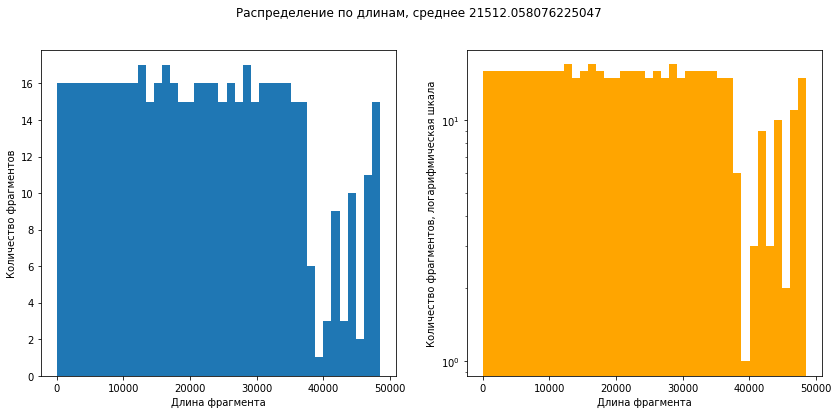

In [14]:
def hist(lens, xtext = 'Длина фрагмента'): 
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    plt.hist(lens, bins=40)
    plt.ylabel('Количество фрагментов')
    plt.xlabel(xtext)
    plt.subplot(122)
    plt.hist(lens, bins=40, log=True, color='orange')
    plt.ylabel('Количество фрагментов, логарифмическая шкала')
    plt.xlabel(xtext)
    plt.suptitle(f'Распределение по длинам, среднее {np.array(lens).mean()}')
    plt.show()

hist(lens)

- Что это распределение говорит о роли длины тРНК в клетке?

## Немного про комплементарность

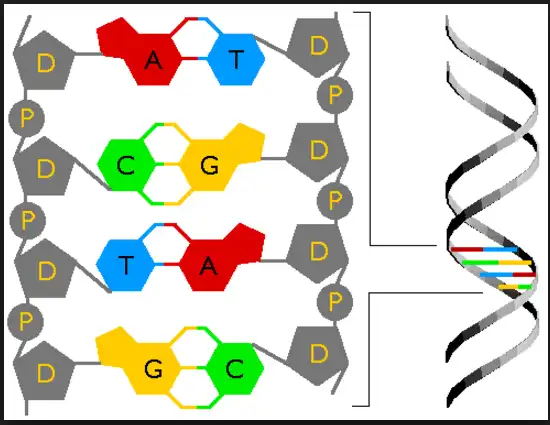

[Википедия](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%BF%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C_(%D0%B1%D0%B8%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%8F))

Обычно в молекула РНК состоит из 4х различных нуклеотидов, которые записывают как: A, U, G, C. В ДНК урацил (U) заменён на тимин (T), эти соединения также очень похожи по структуре. ДНК записывается через последовательность A, T, G, C. 

Они могут образовывать между собой пары, находясь на разных цепях ДНК или на разных половинах шпильки РНК. Мы будем рассматривать пары A-T, G-C. В нашем файле РНК записана с помощью ATGC (T вместо U по историческим причинам).

Структура в которой больше всего пар наиболее устойчива и именно она встречается в клетке, так как пары образуются за счёт водородных связей, а это энергетически выгодно.

## Посчитаем число азотистых оснований

Используйте стандартный counter или просто посчитайте число различных 'букв' в цикл. И положите их в словарь вроде


`{'A': x, 'C': y, 'G': z, 'T': w}`

In [15]:
counter = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
t = 0
for _, seq in readfasta(FILE):
    for i in seq:
        counter[i] += 1
    
counter

{'A': 2494539, 'C': 2919322, 'G': 3497956, 'T': 2941327}

Теперь построим график

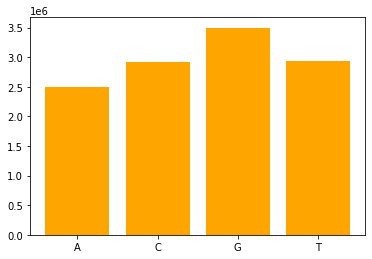

In [16]:
labels, values = zip(*counter.items())
plt.bar(labels, values, color='orange')
plt.show()

- Почему они распределены неравномерно?

## Теперь давайте найдём шпильки

Возьмём случайную последовательность из файла

In [17]:
s = 'GGGCTTATAGTTTAATTGGTTGAAACGTACCGCTCATAACGGTTATATTGTAGGTTCGAGCCCTACTAAGCCTACCACCCC'
s = s.replace('T', 'U')
s

'GGGCUUAUAGUUUAAUUGGUUGAAACGUACCGCUCAUAACGGUUAUAUUGUAGGUUCGAGCCCUACUAAGCCUACCACCCC'

Первичной структурой РНК называют её последовательность. Она находится в файле. Вторичной структурой называют связи между основаниями (AU, GC) внутри цепи (шпильки) или между различными цепями. Мы будем искать взаимодействия внутри одной цепи.

Количество возможных комбинаций [можно оценить](https://rosalind.info/problems/pmch/), но их слишком много для перебора. Поэтому эта задача решается с помощью [динамического программирования](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5). Первый алгоритм который предсказывал структуру РНК - [алгоритм Нуссинов](https://en.wikipedia.org/wiki/Nussinov_algorithm).

- Я предлагаю написать его [по этой статье](https://bayesianneuron.com/2019/02/nussinov-predict-2nd-rna-fold-structure-algorithm/), в ней приведён код и всё подробно объясняется.
- [Перевод в google translate](https://bayesianneuron-com.translate.goog/2019/02/nussinov-predict-2nd-rna-fold-structure-algorithm/?_x_tr_sl=en&_x_tr_tl=ru&_x_tr_hl=ru&_x_tr_pto=wapp).
- [Полный код из статьи](https://bayesianneuron.com/code/rna_nussinov.py).
- В этом [видео](https://www.youtube.com/watch?v=Wdl-xJpnq4k) показано как это можно сделать вручную на бумаге.


In [18]:
# Дп по подотрезкам: dp[l][r] - ответ на отрезке [l; r]. 
# Ищем элемент, с которым связывается l. Пусть это k, тогда формула пересчета
# выглядит следующим образом: dp[l][r] max= dp[l + 1][k - 1] + dp[k + 1][r] + cost(l, k)
# cost(l, k) = 2 или 3, в зависимости от s[l] и s[k].
n = len(s)
dp = [[0 for i in range(n)] for j in range(n)]
for l in range(n - 1, -1, -1):
  for r in range(l + 1, n):
    dp[l][r] = dp[l + 1][r]
    for k in range(l + 1, r + 1):
      if (s[l] == 'A' and s[k] == 'U') or (s[l] == 'U' and s[k] == 'A'):
        dp[l][r] = max(dp[l][r], dp[l + 1][k - 1] + (dp[k + 1][r] if k + 1 < r else 0) + 2)
      if (s[l] == 'G' and s[k] == 'C') or (s[l] == 'C' and s[k] == 'G'):
        dp[l][r] = max(dp[l][r], dp[l + 1][k - 1] + (dp[k + 1][r] if k + 1 < r else 0) + 3)
print(dp[0][n - 1])

87


## Как такие задачи решаются теперь

С тех пор как этот алгоритм был впервые предложен, прошло более 40 лет. За это время технологии сильно продвинулись, и теперь поиск структуры РНК и наиболее сложная задача поиска структуры белка решаются с помощью нейросетей.

Например алгоритм [AlphaFold](https://alphafold.com/) позволяет предсказывать структуру белка по его последовательности с такой же точностью, с какой это делают учёные с огромными и дорогими экспериментальными установками.

## Чем мастерская отличается от этого задания?
- Мы не будем глубже обсуждать биологию, только если вам будут интересны конкретные моменты.
- Мы будем больше работать с новыми библиотеками.
- Мы будем писать алгоритмы, в которых важно разобраться.

## Ссылки
- [статья из лекции](https://www.semanticscholar.org/paper/PhageAI-Bacteriophage-Life-Cycle-Recognition-with-Tynecki-Guzi%C5%84ski/980ca01bc69a3334da1580a4d22210f94d470f51)
- [туториал по git](https://learngitbranching.js.org/?locale=ru_RU)

## Бонус: теперь можно посмотреть на шпильки
Давайте нарисуем РНК чтобы посмотреть на шпильки. Мы можем представить всю последовательность РНК в виде [графа](https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D1%84_(%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0)). А графы очень часто представляют в виде [матрицы смежности](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0_%D1%81%D0%BC%D0%B5%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D0%B8).
- на месте связи - 1
- там где связи нет остаётся 0
- так как основания не замыкаются на себя, главная диагональ заполнена 0
- очевидно соседние основания в цепи связаны между собой - в матрице будет диагональ из 1 выше главной диагонали

In [19]:
# Используйте эту функцию чтобы сделать шаблон цепи без боковых связей
from collections import deque
def getchain(lenght):
    g = np.identity(len(s))
    g = np.vstack((g, np.zeros(len(s))))
    g = g[1:, :]
    q = deque()
    q.append((0, n - 1))
    while len(q) > 0:
        l, r = q[0][0], q[0][1]
        q.popleft()
        if (r <= l):
            continue
        if (dp[l][r] == dp[l + 1][r]):
            q.append((l + 1, r))
        else:
            for k in range(l + 1, r + 1):
                if (s[l] == 'A' and s[k] == 'U') or (s[l] == 'U' and s[k] == 'A'):
                    if (dp[l][r] == dp[l + 1][k - 1] + (dp[k + 1][r] if k + 1 < r else 0) + 2):
                        g[l][k] = 1
                        q.append((l + 1, k - 1))
                        q.append((k + 1, r))
                        break
                if (s[l] == 'G' and s[k] == 'C') or (s[l] == 'C' and s[k] == 'G'):
                    if (dp[l][r] == dp[l + 1][k - 1] + (dp[k + 1][r] if k + 1 < r else 0) + 3):
                        g[l][k] = 1
                        q.append((l + 1, k - 1))
                        q.append((k + 1, r))
                        break

    return g

In [20]:
# напишите функцию, которая строит матрицу смежности на основе матрицы из предыдущего задания

In [21]:
import networkx as nx
import matplotlib

# строит граф по матрице
def plotRNA(connection_matrix, s):
    plt.figure(figsize=(10,10))
    G = nx.Graph(m)
    nx.draw(G, pos=nx.spiral_layout(G, equidistant=True), labels = dict(zip(G.nodes, list(s))), with_labels=True, font_color="white")

In [22]:
# тестовая шпилька
m = getchain(len(s))

print(m)

[[0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


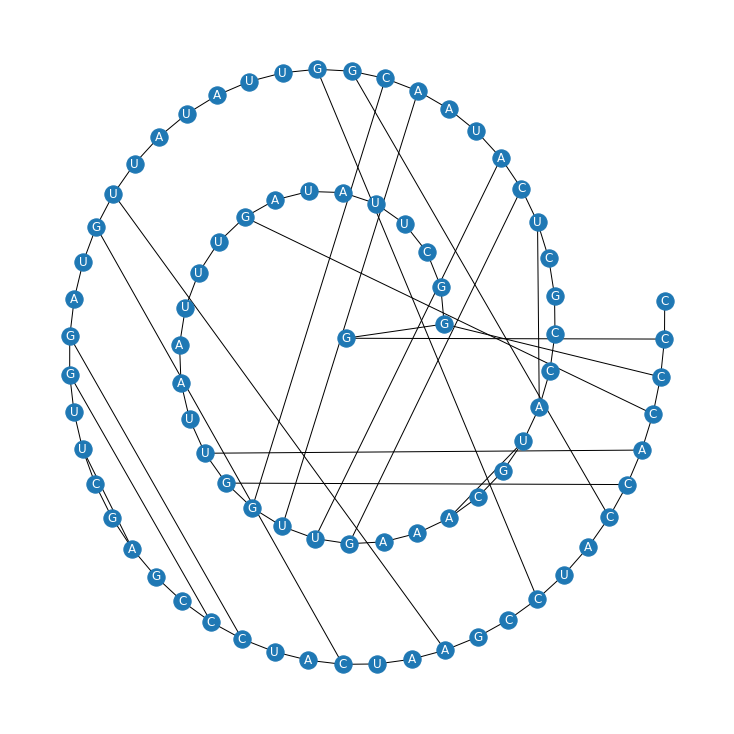

In [23]:
# рисуем тестовую шпильку
plotRNA(m, s)